# STAT40800 Data Programming with Python
## Dr. Áine Byrne


# Week 11

Last week we began looking at machine learning in Python, and learned about supervised learning algorithms. This week we turn to unsupervised and reinforcement learning. We will focus on clustering algorithms, which are a particular type of unsupervised learning algorithm. We will briefly discuss other unsupervised learning algorithms, as well as the ideas behind reinforcement learning.

As with last week, this lecture is more or less a summary of the most useful bits
from scikit-learn.org. The [examples page](https://scikit-learn.org/stable/auto_examples/index.html) is particularly worth reading.

We will also look at some web scraping techniques this week. We will use BeautifulSoup for web scraping. You will find more information about this package on the [BeautifulSoup documentation page](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).


In [6]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import numpy.random as npr
import matplotlib.pyplot as plt

# Unsupervised learning

Rather than looking for a relationship between our observations $y$ and features $X$, 
unsupervised learning algorithms search for relationships within the data without defining which variables are feature and which is the observation. Unsupervised learning is typically used to discover hidden patterns within data.

Unsupervised learning problems are typically separated into *clustering* and *association* problems. We will focus on clustering algorithm and only briefly discuss association.

## Clustering

Clustering algorithms process your data and try to identity stucture and natural groupings. These groupings are known as clusters, and the data within a cluster is similar but dissimilar data in other clusterss.

For this section we will consider the iris dataset, from the final non-assessed exercise last week. The data is for 3 different types of iris: setosa, virginica and versicolor. Hence, we already know the clusters, but we will see how well the different clustering algorithms can predict them.

Text(0, 0.5, 'petal width (cm)')

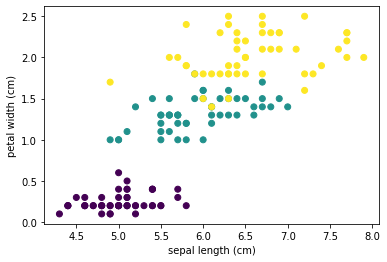

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = DataFrame(iris.data,columns=iris.feature_names)
plt.scatter(iris_df['sepal length (cm)'], iris_df['petal width (cm)'], c=iris.target)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')

#### Exercise 1
Load in the wine dataset from sklearn (`load_wind`). Extract the feature matrix and save it as a DataFrame. Plot the wine hue against the alcohol percentage, and colour the points based on the cultivator (the target/response variable). How many different cultivators are included in this dataset?

### k-means clustering
k-means clustering is one of the simplest and most well known unsupervised learning algorithms.
The user defines the number of clusters (k) and the algorithm works to find k local minima in the data.
To begin, the cluster *centres* are chosen at random and each data point is assigned to the cluster with the *closest* centre. At the next iteration, the mean value of each variable in each of the clusters is computed and the means are used as the new centres. Again, the data points are reassigned to their closest cluster. This process repeats until the cluster centres no longer change.

The goal of the k-means clustering algorithm is to minimise the mean squared error, i.e. the average squared distance between each of the data points and their cluster centre.

The function for k-means clustering in Python is `KMeans` and it is in the `cluster` module of sklearn. The syntax is similar to the supervised learning algorithms we saw last week. We first declare the model and then apply the fit method to fit the model to our data.

In [8]:
from sklearn.cluster import KMeans

In [9]:
model = KMeans(n_clusters=3)
model.fit(iris_df)

KMeans(n_clusters=3)

Then we apply the predict method, and plot the results to show the clusters.

Text(0, 0.5, 'petal width (cm)')

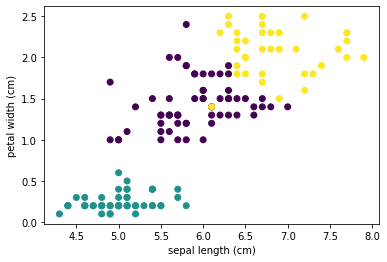

In [10]:
preds = model.predict(iris_df)
plt.scatter(iris_df['sepal length (cm)'], iris_df['petal width (cm)'], c=preds)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')

#### Exercise 2
Perform a k-means cluster analysis for the wine dataset. You should set the number of clusters to be equal to the number of different cultivators. Is the k-means algorithm successful in separating the wines by cultivator?

### Hierarchical clustering
Hierarchical clustering algorithms work by assuming each data points is itself a cluster. The closest two clusters are iteratively merged until we are left with one cluster containing all of the data. 

The results of hierarchical clustering are typically shown using dendrogram. For a legible dendrogram, we can only use a few data points. Below we take a small sample of the iris dataset.

In [ ]:
npr.seed(123)
n=25
ind = npr.permutation(len(iris.target))
iris_sub = iris_df.iloc[ind[:n]]
labels = iris.target[ind[:n]]
iris_sub.shape
labels.shape

The functions for hierarchical clustering in Python are part of the `cluster.hierarchy` module of scipy. We perform the clustering using the `linkage` function, and plot the results using the `dendrogram` function.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(iris_sub,method='complete')
dendrogram(mergings,labels=labels)
plt.show()

Now we can choose an arbitrary number of clusters and assign our datapoints accordingly.

Unfortunately, hierarchical clustering doesn't work very for large datasets.

Other clustering methods include:
* Affinity propagation
* Spectral clustering
* Mixture of Gaussians

See the [sklearn documentation on clustering](https://scikit-learn.org/stable/modules/clustering.html) for a comparison of the different methods and how to use them.

**A cautionary note:** The effectiveness of a method depends on the definition of *distance*. Different distance measures may produce different results. Similarly, many algorithm require the user to select the number of clusters. This choice is arbitrary and will affect the results.

#### Exercise 3
Take a random subset of size 30 from the wine dataset (using the random seed 123) and 
perform a hierarchical cluster analysis. What can you learn about the data from this analysis? Is the wine from one of the cultivators more dissimilar to the other two?

## Association
Association rule learning tries to find relationships between variables within large datasets. The reationship is typically a set of rules or frequent itemsets.
For example, an online retailer might want to identify products commonly bought together to suggest additional products for their customers. 

Association rule algorithms rely heavily on probability and likelihood estimation.

The Python package for association rule learning is [apriori](https://pypi.org/project/apyori/). It's not particularly well documented, but Usman Malik has a nice tutorial on association learning in Python, which can be found [here](https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/).

# Reinforcement learning
Reinforcement learning is learning through interacting with an environment. Reinforcement learning differs from supervised learning in that there is no data set from which to learn. The reinforcement *agent* makes a series of decisions and *learns* the result of these decisions. The result is typically a reward or a penalty and the agent adjusts their series of decisions in order to maximise the reward or minimise the penalty. 

To perform reinforcement learning in Python we must define an environment for our learner, which is beyond the scope of this module. If you would like to learn more, I recommend this three part tutorial by Mohammed AL-Ma'amari; [Part 1](https://towardsdatascience.com/reinforcement-learning-with-python-part-1-creating-the-environment-dad6e0237d2d), [Part 2](https://towardsdatascience.com/deep-reinforcement-learning-with-python-part-2-creating-training-the-rl-agent-using-deep-q-d8216e59cf31), [Part 3](https://towardsdatascience.com/deep-reinforcement-learning-with-python-part-3-using-tensorboard-to-analyse-trained-models-606c214c14c7)

# Web scraping

Web scraping is the art of extracting data from web pages and turning it into useful information. Python has a number of packages for this, but the king is BeautifulSoup which makes the process much easier. 

To be *really good* at web scraping you need good knowledge
of html. Try the [w3schools HTML tutorial](https://www.w3schools.com/html/) if you want to learn the basics. We will assume no prior knowledge of html here.

Let's begin by importing BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup

We will also need the requests package, which extracts information from a given web address. See the [requests documentation page](https://docs.python-requests.org/en/latest/) for more information on this package.

In [ ]:
import requests

Now we will use requests to open a website. We then take the text from the webpage and turn it into soup

In [ ]:
page = requests.get('https://www.irishtimes.com/')
soup = BeautifulSoup(page.text, 'html.parser')


First nice thing that BeautifulSoup does is print out the html neatly

In [ ]:
print(soup.prettify())

Aside from the raw html BeautifulSoup will also pick out bits for you

In [ ]:
soup.title

You can also extract important bits of the html. For example, link are enclosed in `<a>` `</a>`'s in html, so `find_all('a')` will find all the links on a webpage.

In [ ]:
soup.find_all('a')

Paragraphs/chunks of text are enclosed in `<p>` `</p>`'s

In [ ]:
soup.find_all('p')

For headings we use h's, with a number specifying the hierarchy. For example, the main heading will be enclosed in `<h1>` `</h1>`'s, while the next level of subheadings will be enclosed in `<h2>` `</h2>`'s

In [ ]:
soup.find_all('h2')

Headlines are given as `span`'s with a `h` class, so extract the headlines, we use

In [ ]:
soup.find_all('span',class_='h2')

We could even use a regular expression to return both all `span`'s of class `h_`

In [ ]:
import re
soup.find_all('span',class_=re.compile(r'h[0-9]+'))

Even more usefully, you can extract the relevant classes of certain objects. It's often useful to look at the raw html to get an idea of which bits to extract. Doing so, you'll see that links have different `data-category`s. To see all of the news stories we can use the following

In [ ]:
soup.find_all('a', attrs={'data-category':"News"})

We saw that headlines are given as `span`s with a `h_` class. Trending headlines are specifies by the `tr-headline` class

In [ ]:
soup.find_all('span',class_='tr-headline')

If you go to [The Irish Times website](https://www.irishtimes.com/) you will see that these headlines match the articles listed under *Most Read* along the right-hand side of the page.

Some useful things you could use BeautifulSoup to automate for you:
* Downloading product pages from e.g. amazon and others, and comparing prices
* Looking at changing news stories over time by e.g. keywords
* Automatically finding house prices as advertised by estate agents and comparing them to the price sold on the property price register